In [26]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

In [28]:
# Show the first training example
print(f"Training sample:\n{train_data[0]}\n")
print(f"Training label: {train_labels[0]}")

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [29]:
# Check the shape of our data
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

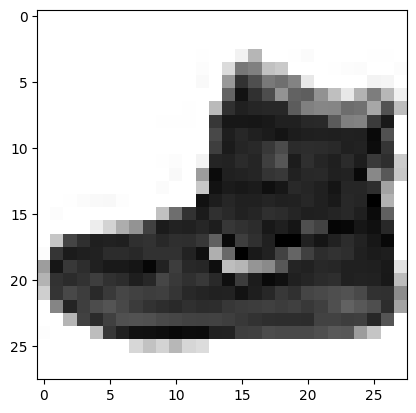

In [30]:
plt.imshow(train_data[0], cmap = plt.cm.binary);

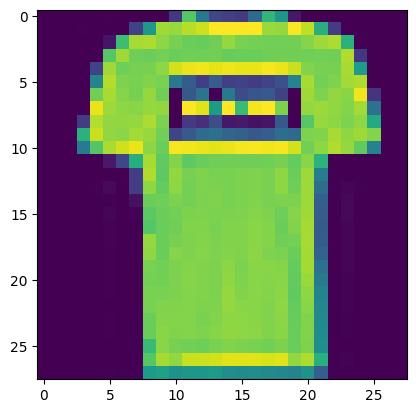

In [31]:
plt.imshow(train_data[1]);

In [32]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# How many classes are there (this'll be our output shape)?
len(class_names)

10

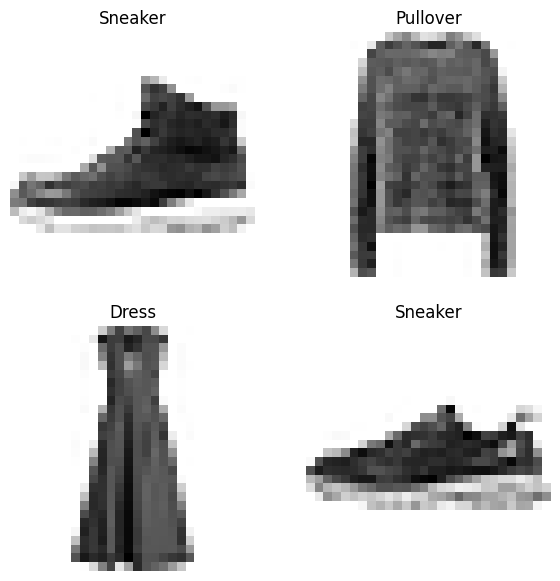

In [33]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

* The **input shape** will have to deal with `28x28 tensors` (the height and width of our images).
  * We're actually going to `squash` the input into a tensor (vector) of shape `(784)`.
* The **output shape** will have to be `10` because we need our model to predict for **10 different classes**.
  * We'll also change the `activation` parameter of our output layer to be [`"softmax"`](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax) instead of `'sigmoid'`. As we'll see the `"softmax"` activation function outputs a series of values between 0 & 1 (the same shape as **output shape**, which together add up to ~1). The index with the highest value is predicted by the model to be the most **likely** class.
* We'll need to change our loss function from a `binary loss function to a multiclass loss function`.
  * More specifically, since our labels are in integer form, we'll use [`tf.keras.losses.SparseCategoricalCrossentropy()`](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf/keras/losses/SparseCategoricalCrossentropy), if our labels were one-hot encoded (e.g. they looked something like `[0, 0, 1, 0, 0...]`), we'd use [`tf.keras.losses.CategoricalCrossentropy()`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy).
* We'll also use the `validation_data` parameter when calling the `fit()` function. This will give us an idea of how the model performs on the test set during training.

In [36]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_1.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # different loss function for multiclass classifcation
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model
non_norm_history = model_1.fit(train_data,
                                train_labels,
                                epochs=10,
                                validation_data=(test_data, test_labels)) # see how the model performs on the test set during training

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.1142 - loss: 2.5776 - val_accuracy: 0.1618 - val_loss: 2.1515
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 888us/step - accuracy: 0.1684 - loss: 2.1420 - val_accuracy: 0.2089 - val_loss: 2.0535
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 819us/step - accuracy: 0.2199 - loss: 1.9327 - val_accuracy: 0.2344 - val_loss: 1.7567
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 945us/step - accuracy: 0.2321 - loss: 1.7510 - val_accuracy: 0.2325 - val_loss: 1.7221
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 759us/step - accuracy: 0.2376 - loss: 1.7213 - val_accuracy: 0.2690 - val_loss: 1.6856
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 740us/step - accuracy: 0.2689 - loss: 1.6796 - val_accuracy: 0.2904 - val_loss: 1.6523
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 727us/step - accuracy: 0.2956 - loss: 1.6350 - val_accuracy: 0.3034 - val_loss: 1.6082
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 742us/step - accuracy: 0.3068 - l

In [37]:
model_1.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         3,140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │            50 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [38]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [39]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# Check the min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [40]:
# Set random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # input layer (we had to reshape 28x28 to 784)
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(4, activation="relu"),
  tf.keras.layers.Dense(10, activation="softmax") # output shape is 10, activation is softmax
])

# Compile the model
model_2.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

# Fit the model (to the normalized data)
norm_history = model_2.fit(train_data,
                            train_labels,
                            epochs=10,
                            validation_data=(test_data, test_labels))

c:\Deep_Learning\TensorFlow_For_Deep_Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 938us/step - accuracy: 0.4042 - loss: 1.6309 - val_accuracy: 0.7006 - val_loss: 0.7699
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 997us/step - accuracy: 0.7181 - loss: 0.7339 - val_accuracy: 0.7367 - val_loss: 0.7038
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 930us/step - accuracy: 0.7522 - loss: 0.6715 - val_accuracy: 0.7622 - val_loss: 0.6566
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 895us/step - accuracy: 0.7734 - loss: 0.6302 - val_accuracy: 0.7731 - val_loss: 0.6316
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 944us/step - accuracy: 0.7865 - loss: 0.6022 - val_accuracy: 0.7798 - val_loss: 0.6176
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 869us/step - accuracy: 0.7943 - loss: 0.5844 - val_accuracy: 0.7856 - val_loss: 0.6083
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 940us/step - accuracy: 0.7992 - loss: 0.5715 - val_accuracy: 0.7912 - val_loss: 0.5986
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 933us/step - accuracy: 0.8034 -

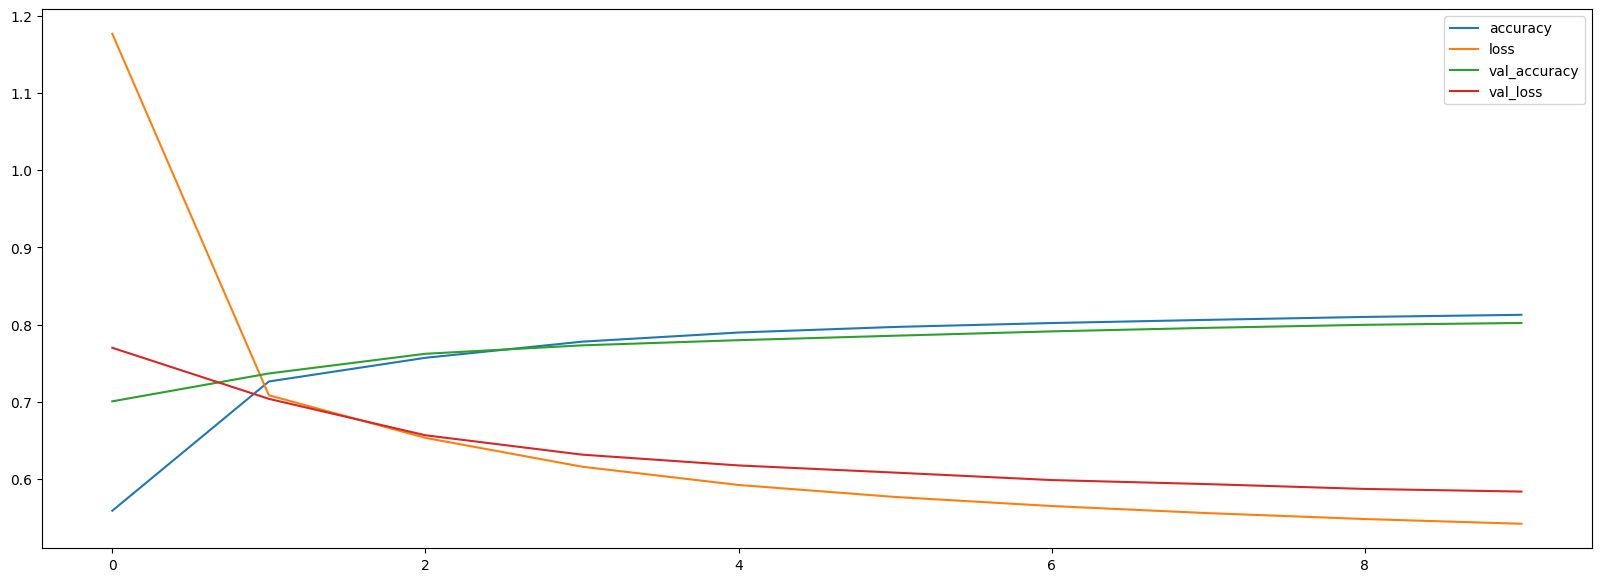

In [48]:
pd.DataFrame(norm_history.history).plot(figsize = (20, 7));

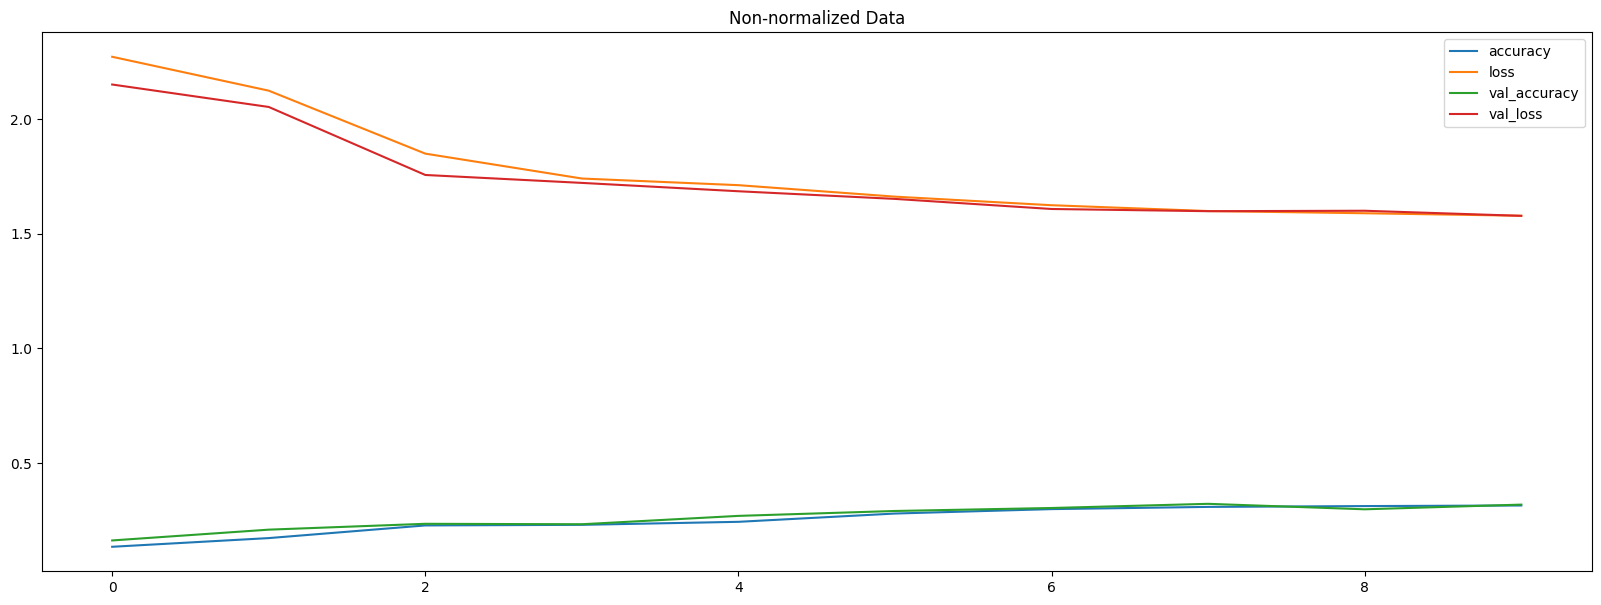

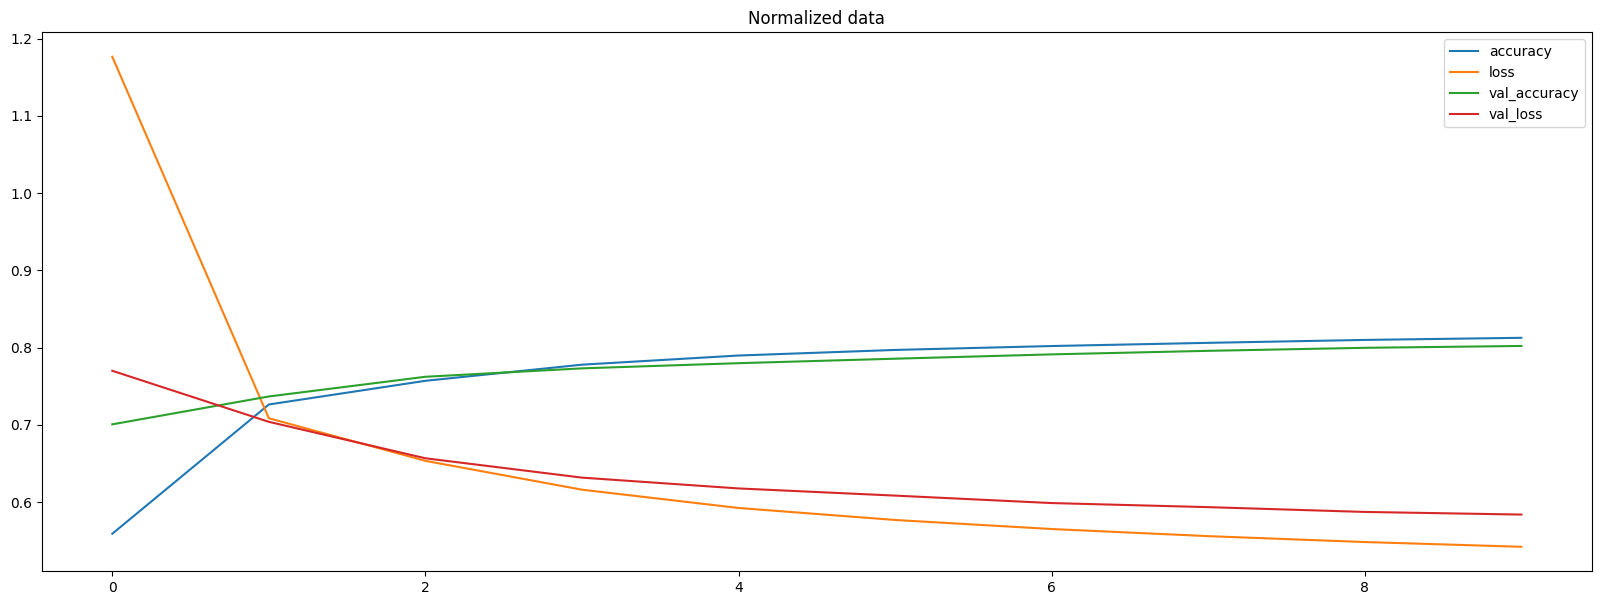

In [50]:
import pandas as pd
# Plot non-normalized data loss curves
pd.DataFrame(non_norm_history.history).plot(title="Non-normalized Data", figsize = (20, 7))
# Plot normalized data loss curves
pd.DataFrame(norm_history.history).plot(title="Normalized data", figsize = (20, 7));

In [53]:
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics = ["accuracy"],
    optimizer = "adam"
)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epochs: 1e-3 * 10 ** (epochs / 20))
find_lr_history = model_3.fit(train_data, train_labels, epochs = 25, validation_data = (test_data, test_labels), callbacks = [lr_scheduler])

Epoch 1/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7436 - loss: 0.7193 - val_accuracy: 0.8444 - val_loss: 0.4309 - learning_rate: 0.0010
Epoch 2/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8546 - loss: 0.4040 - val_accuracy: 0.8553 - val_loss: 0.3864 - learning_rate: 0.0011
Epoch 3/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8669 - loss: 0.3636 - val_accuracy: 0.8623 - val_loss: 0.3742 - learning_rate: 0.0013
Epoch 4/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8748 - loss: 0.3393 - val_accuracy: 0.8565 - val_loss: 0.3816 - learning_rate: 0.0014
Epoch 5/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.8794 - loss: 0.3267 - val_accuracy: 0.8535 - val_loss: 0.4005 - learning_rate: 0.0016
Epoch 6/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8810 - loss: 0.3218 - val_accuracy: 0.8552 - val_loss: 0.3919 - learning_rate: 0.0018
Epoch 7/25
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8865 - l

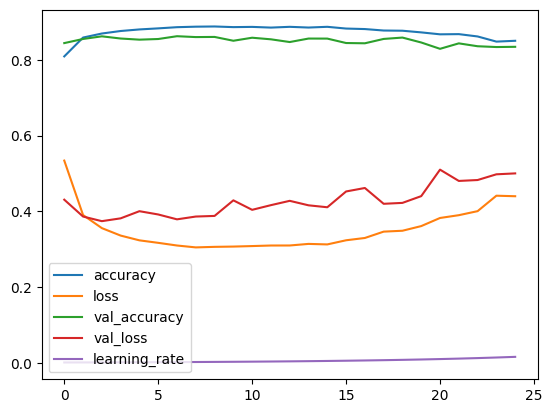

In [56]:
pd.DataFrame(find_lr_history.history).plot();

(0.001, 0.0012589254117941675)

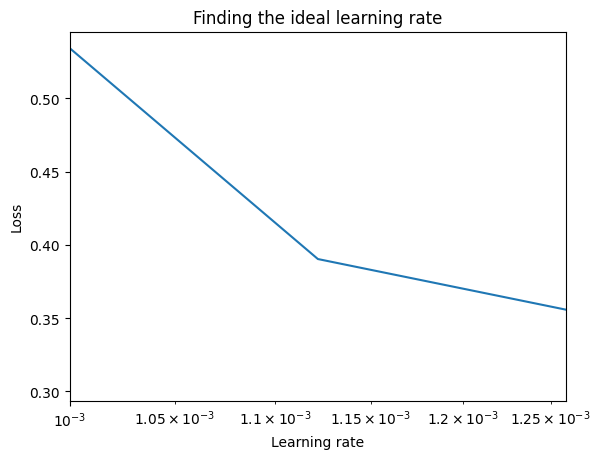

In [60]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt
lrs = 1e-3 * (10**(np.arange(25)/20))
plt.semilogx(lrs, find_lr_history.history["loss"]) # want the x-axis to be log-scale
plt.xlabel("Learning rate")
plt.ylabel("Loss")
plt.title("Finding the ideal learning rate");

plt.xlim(10 ** (-3), 10 ** (-2.9))

In [62]:
# Set random seed
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28, 28)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

# Compile the model
model_4.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(learning_rate=(1.05 * 10 ** (-3))), # ideal learning rate (same as default)
                 metrics=["accuracy"])

# Fit the model
history = model_4.fit(train_data,
                       train_labels,
                       epochs=20,
                       validation_data=(test_data, test_labels))

c:\Deep_Learning\TensorFlow_For_Deep_Learning\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7483 - loss: 0.7173 - val_accuracy: 0.8461 - val_loss: 0.4252
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8562 - loss: 0.4024 - val_accuracy: 0.8559 - val_loss: 0.3948
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 970us/step - accuracy: 0.8697 - loss: 0.3562 - val_accuracy: 0.8570 - val_loss: 0.3858
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 993us/step - accuracy: 0.8777 - loss: 0.3324 - val_accuracy: 0.8534 - val_loss: 0.3984
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 968us/step - accuracy: 0.8835 - loss: 0.3135 - val_accuracy: 0.8588 - val_loss: 0.3892
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 979us/step - accuracy: 0.8884 - loss: 0.2989 - val_accuracy: 0.8576 - val_loss: 0.3987
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 952us/step - accuracy: 0.8930 - loss: 0.2873 - val_accuracy: 0.8681 - val_loss: 0.3718
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8960 - los

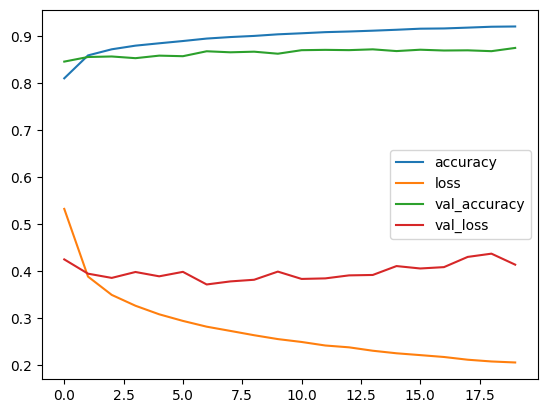

In [63]:
pd.DataFrame(history.history).plot();

In [64]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
import itertools
from sklearn.metrics import confusion_matrix

# Our function needs a different name to sklearn's plot_confusion_matrix
def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):
  """Makes a labelled confusion matrix comparing predictions and ground truth labels.

  If classes is passed, confusion matrix will be labelled, if not, integer class values
  will be used.

  Args:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).

  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # ground truth test labels
                          y_pred=y_preds, # predicted labels
                          classes=class_names, # array of class label names
                          figsize=(15, 15),
                          text_size=10)
  """
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
  n_classes = cm.shape[0] # find the number of classes we're dealing with

  # Plot the figure and make it pretty
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Blues) # colors will represent how 'correct' a class is, darker == better
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title="Confusion Matrix",
         xlabel="Predicted label",
         ylabel="True label",
         xticks=np.arange(n_classes), # create enough axis slots for each class
         yticks=np.arange(n_classes),
         xticklabels=labels, # axes will labeled with class names (if they exist) or ints
         yticklabels=labels)

  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
             horizontalalignment="center",
             color="white" if cm[i, j] > threshold else "black",
             size=text_size)

In [65]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [66]:
y_probs = model_4.predict(test_data)
y_probs[:3]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


array([[8.1947044e-10, 1.2131959e-09, 7.3875339e-16, 8.4543144e-18,
        5.2031708e-18, 5.5931741e-05, 2.4153648e-14, 4.6564801e-06,
        7.0932640e-14, 9.9993944e-01],
       [7.3555668e-05, 1.6935167e-11, 9.9974197e-01, 2.3218901e-12,
        1.5782216e-05, 1.2099728e-17, 1.6867017e-04, 2.1099909e-13,
        5.8139880e-15, 2.3829353e-23],
       [7.1734723e-16, 1.0000000e+00, 1.7123275e-22, 2.0541949e-13,
        1.6987131e-19, 0.0000000e+00, 1.6612539e-14, 0.0000000e+00,
        2.3113498e-26, 3.3267005e-37]], dtype=float32)

In [69]:
y_probs[0], class_names[tf.argmax(y_probs[0]).numpy()]

(array([8.1947044e-10, 1.2131959e-09, 7.3875339e-16, 8.4543144e-18,
        5.2031708e-18, 5.5931741e-05, 2.4153648e-14, 4.6564801e-06,
        7.0932640e-14, 9.9993944e-01], dtype=float32),
 'Ankle boot')

In [70]:
y_preds = y_probs.argmax(axis = 1)
y_preds[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=int64)

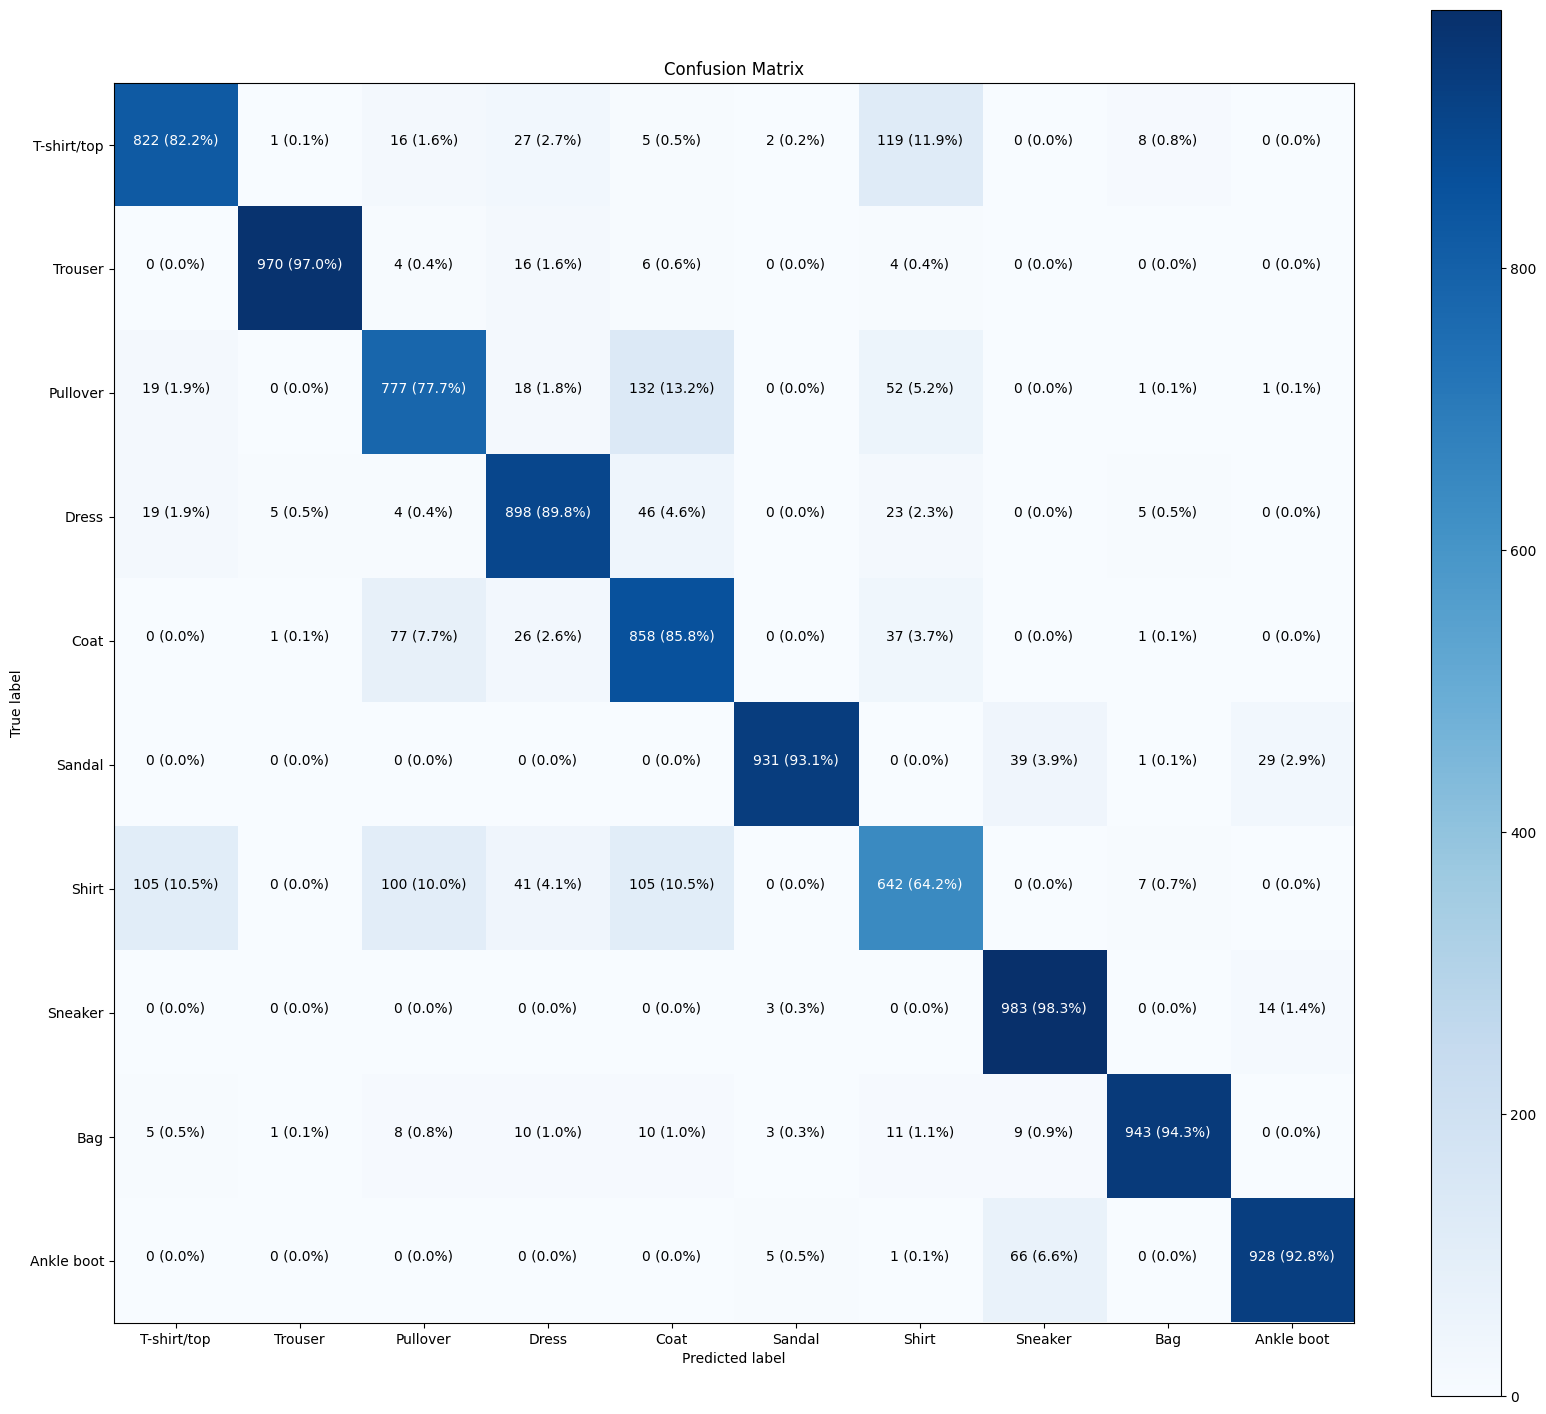

In [78]:
make_confusion_matrix(
    test_labels,
    y_preds,
    classes=class_names,
    figsize=(20, 18),
    text_size=10,
)

In [79]:
import random

# Create a function for plotting a random image along with its prediction
def plot_random_image(model, images, true_labels, classes):
  """Picks a random image, plots it and labels it with a predicted and truth label.

  Args:
    model: a trained model (trained on data similar to what's in images).
    images: a set of random images (in tensor form).
    true_labels: array of ground truth labels for images.
    classes: array of class names for images.

  Returns:
    A plot of a random image from `images` with a predicted class label from `model`
    as well as the truth class label from `true_labels`.
  """
  # Setup random integer
  i = random.randint(0, len(images))

  # Create predictions and targets
  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1, 28, 28)) # have to reshape to get into right size for model
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  # Plot the target image
  plt.imshow(target_image, cmap=plt.cm.binary)

  # Change the color of the titles depending on if the prediction is right or wrong
  if pred_label == true_label:
    color = "green"
  else:
    color = "red"

  # Add xlabel information (prediction/true label)
  plt.xlabel("Pred: {} {:2.0f}% (True: {})".format(pred_label,
                                                   100*tf.reduce_max(pred_probs),
                                                   true_label),
             color=color) # set the color to green or red

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


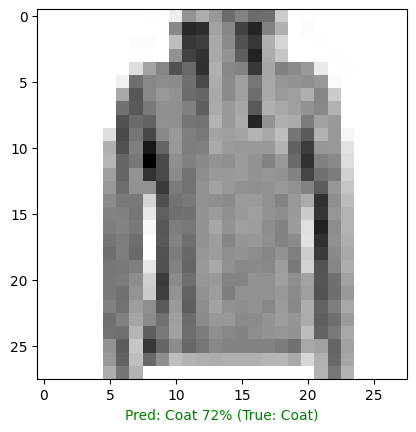

In [82]:
# Check out a random image as well as its prediction
plot_random_image(model=model_4,
                  images=test_data,
                  true_labels=test_labels,
                  classes=class_names)

In [83]:
model_4.layers

[<Flatten name=flatten_6, built=True>,
 <Dense name=dense_20, built=True>,
 <Dense name=dense_21, built=True>,
 <Dense name=dense_22, built=True>,
 <Dense name=dense_23, built=True>]

In [84]:
model_4.layers[0]

<Flatten name=flatten_6, built=True>

In [86]:
weights, biases = model_4.layers[1].get_weights()

weights, weights.shape

(array([[ 0.22395681, -0.2499531 ,  0.63126045, ..., -0.05549302,
          0.25720346,  0.23660897],
        [ 0.00313896,  0.46209958,  0.35032582, ..., -0.28795573,
          0.17184831, -0.37866044],
        [-0.15236448,  1.2626905 , -0.24822992, ..., -0.41914096,
         -0.49369976, -0.13493069],
        ...,
        [-0.09779919, -0.07673962, -0.5053832 , ..., -0.23892131,
         -0.13202374, -0.2802198 ],
        [ 0.13272619,  0.8675354 , -0.5397176 , ..., -0.32421765,
          0.27022904, -0.03077197],
        [ 0.02253794, -0.10052268, -0.46315816, ..., -0.02036288,
         -0.08973534,  0.10537086]], dtype=float32),
 (784, 100))

In [87]:
model_4.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_6 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         1,010 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 100)            │         1,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 244,862 (956.50 KB)

 Trainable params: 81,620 (318.83 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 163,242 (637.67 KB)

In [89]:
biases, biases.shape

(array([ 8.87080252e-01, -2.23840728e-01,  2.93835461e-01,  3.51181775e-01,
         7.38218069e-01, -1.40444720e-02, -2.21663669e-01,  6.03919148e-01,
        -3.39206785e-01,  2.94343770e-01,  2.24890590e-01, -1.78777739e-01,
         2.62674004e-01,  4.45454731e-04,  9.55224857e-02,  1.66113153e-01,
         6.02789938e-01,  2.41721362e-01,  4.28726524e-01,  1.65668458e-01,
         1.37455598e-01, -3.60610098e-01,  1.15740463e-01,  7.92529061e-02,
         6.02240443e-01,  4.08292443e-01, -3.36088687e-02,  8.66237283e-02,
         6.38092220e-01, -2.19316855e-02,  1.91372469e-01,  4.56650436e-01,
         3.51602763e-01,  1.32629126e-01, -2.04460531e-01, -1.43977702e-01,
         8.64560723e-01, -1.42742582e-02,  1.28545597e-01, -3.04439127e-01,
         1.26878666e-02,  2.32006297e-01,  1.87381729e-01,  3.12777579e-01,
        -1.09886259e-01, -5.25293231e-01,  2.62366142e-02,  7.04283416e-01,
         5.01087785e-01,  1.74084187e-01, -6.94600880e-01,  5.53746581e-01,
         7.8

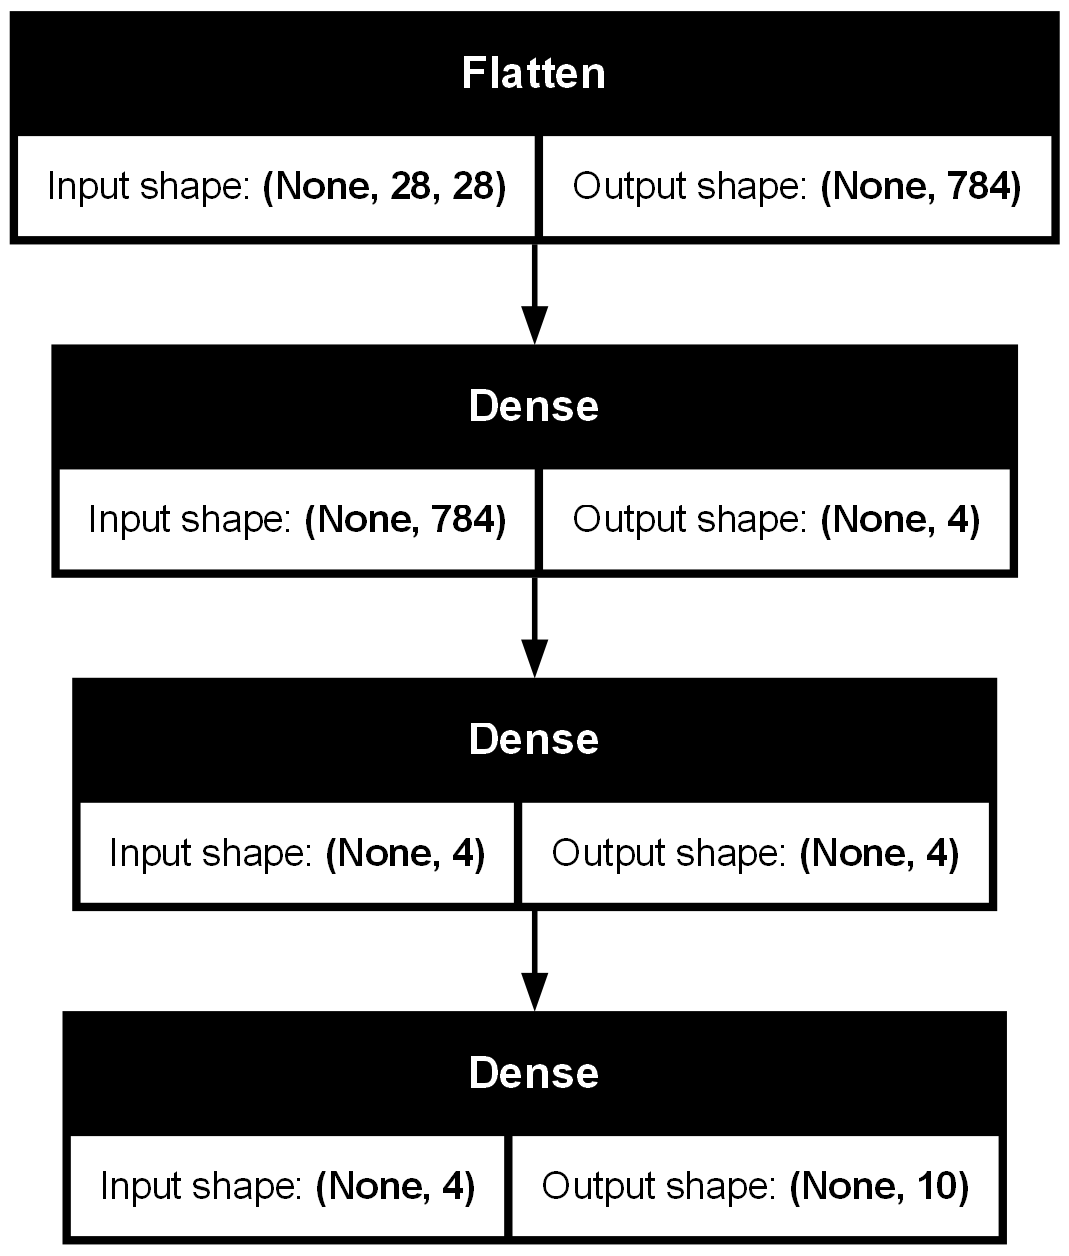

In [90]:
from tensorflow.keras.utils import plot_model

# See the inputs and outputs of each layer
plot_model(model_14, show_shapes=True)